# Book Recommendation System and Prediction

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration Data

In [2]:
# Upload semua file CSV yang kamu butuhkan
uploaded = files.upload()

# Load masing-masing file ke dalam DataFrame
df_user = pd.read_csv('Users.csv')
df_books = pd.read_csv('Books.csv')
df_rating = pd.read_csv('Ratings.csv')

Saving Books.csv to Books.csv
Saving Ratings.csv to Ratings.csv
Saving Users.csv to Users.csv


In [3]:
print(df_user.head())
print("-"*80)
print(df_books.head())
print("-"*80)
print(df_rating.head())

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
--------------------------------------------------------------------------------
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                200

### Statistik Deskriptif

In [4]:
df_user.info()
print("-"*50)
df_user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
--------------------------------------------------


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [5]:
df_books.info()
print("-"*80)
df_books.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
--------------------------------------------------------------------------------


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [6]:
df_rating.info()
print("-"*50)
df_rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
--------------------------------------------------


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Mengecek Missing Value

In [8]:
print(f"Dataset User\n{df_user.isnull().sum()}")
print("-" * 25)
print(f"Dataset Books\n{df_books.isnull().sum()}")
print("-" * 25)
print(f"Dataset Rating\n{df_rating.isnull().sum()}")

Dataset User
userID           0
Location         0
Age         110762
dtype: int64
-------------------------
Dataset Books
ISBN           0
Title          0
Author         2
Year           0
Publisher      2
Image-URL-S    0
Image-URL-M    0
Image-URL-L    3
dtype: int64
-------------------------
Dataset Rating
userID    0
ISBN      0
Rating    0
dtype: int64


## Data Preparation

### Exploratory Data Analysis (EDA)

#### Mengubah Nama Kolom dan Tipe Data

In [7]:
# Mengubah nama kolom
df_user.rename(columns={'User-ID':'userID'},inplace=True)
df_books.rename(columns={'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Year'},inplace=True)
df_rating.rename(columns={'Book-Rating':'Rating','User-ID':'userID',},inplace=True)

# Mengubah Tipe Data
df_user['Age'] = df_user['Age'].astype('Int64')

#### Dataset Buku `df_books`

In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Title        271360 non-null  object
 2   Author       271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image-URL-S  271360 non-null  object
 6   Image-URL-M  271360 non-null  object
 7   Image-URL-L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**1. Menghapus Kolom Yang Tidak Diperlukan**

In [10]:
df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1, inplace=True)
df_books.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**2. Melihat Data Anomali Pada Kolom `Year`**

In [11]:
df_books['Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Insight

Terdapat kesalahan pada pengisian tahun penerbitan.

In [12]:
df_books[df_books['Year'].isin(['DK Publishing Inc', 'Gallimard'])]

,ISBN,Title,Author,Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


Insight


Ternyata pada kolom `Title` terdapat nama Author yang seharusnya berada pada kolom `Author` dan begitu juga dengan kolom `Year` dan `Publisher`.

In [13]:
# Data perbaikan
book_fixes = [
    {
        'ISBN': '0789466953',
        'Year': 2000,
        'Author': 'James Buckley',
        'Publisher': 'DK Publishing Inc',
        'Title': 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
    },
    {
        'ISBN': '078946697X',
        'Year': 2000,
        'Author': 'Michael Teitelbaum',
        'Publisher': 'DK Publishing Inc',
        'Title': 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
    },
    {
        'ISBN': '2070426769',
        'Year': 2003,
        'Author': 'Jean-Marie Gustave Le Clézio',
        'Publisher': 'Gallimard',
        'Title': "Peuple du ciel, suivi de 'Les Bergers"
    }
]

# Perulangan untuk update
for book in book_fixes:
    df_books.loc[df_books.ISBN == book['ISBN'], ['Year', 'Author', 'Publisher', 'Title']] = [
        book['Year'],
        book['Author'],
        book['Publisher'],
        book['Title']
    ]

# Cek data perbaikan
df_books.loc[df_books.ISBN.isin(['0789466953', '078946697X', '2070426769']), :]

,ISBN,Title,Author,Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le Clézio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


**3. Mengecek Missing Value**

In [14]:
df_books.isnull().sum()

,0
ISBN,0
Title,0
Author,2
Year,0
Publisher,2


In [15]:
df_books[df_books['Author'].isnull() | df_books['Publisher'].isnull()]

,ISBN,Title,Author,Year,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


Insight

Ternyata ada nilai null (`NaN`) pada kolom `Author` dan `Publisher`.

In [16]:
df_books = df_books.dropna(subset=['Author', 'Publisher'])
df_books.isnull().sum()

,0
ISBN,0
Title,0
Author,0
Year,0
Publisher,0


**4. Mengubah Tipe Data Kolom `Year`**

In [17]:
df_books['Year'] = pd.to_numeric(df_books['Year'], errors='coerce')
# df_books['Year'] = df_books['Year'].astype('Int64')
df_books['Year'].sort_values().unique()

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

**5. Menyortir Buku Berdasarkan Tahun Terbit**

In [18]:
df_books[(df_books['Year'] >= 1950) & (df_books['Year'] <= 2025) & (df_books['Year'] != 0)]

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [19]:
df_books[df_books['Year'] == 0]

,ISBN,Title,Author,Year,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


Insight

Terdapat angka 0 pada tahun terbit yang dimana ini adalah sebuah kesalahan yang terjadi dari sisi penginputan ataupun nilai placeholder yang diisi dengan angka `0` bukan `NaN`.

In [20]:
df_books = df_books.loc[(df_books['Year'] >= 1950) & (df_books['Year'] <= 2025) & (df_books['Year'] != 0)]
df_books['Year'].sort_values().unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024])

#### Dataset Pengguna `df_user`

In [21]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userID    278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       168096 non-null  Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 6.6+ MB


**1. Mengecek Missing Value**

In [22]:
df_user.isnull().sum()

,0
userID,0
Location,0
Age,110762


Insight

Terdapat banyak nilai null pada kolom `Age`.

In [23]:
df_user[df_user['Age'].isnull()]

,userID,Location,Age
0,1,"nyc, new york, usa",<NA>
2,3,"moscow, yukon territory, russia",<NA>
4,5,"farnborough, hants, united kingdom",<NA>
6,7,"washington, dc, usa",<NA>
7,8,"timmins, ontario, canada",<NA>
...,...,...,...
278849,278850,"sergnano, lombardia, italy",<NA>
278853,278854,"portland, oregon, usa",<NA>
278855,278856,"brampton, ontario, canada",<NA>
278856,278857,"knoxville, tennessee, usa",<NA>


In [24]:
df_user = df_user.dropna(subset=['Age'])
df_user.isnull().sum()

,0
userID,0
Location,0
Age,0


**2. Menyortir Umur Pengguna**

In [25]:
df_user['Age'].sort_values().unique()

<IntegerArray>
[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
 ...
 220, 223, 226, 228, 229, 230, 231, 237, 239, 244]
Length: 165, dtype: Int64

Insight

Terdapat umur yang tidak masuk akal, yaitu minimal 0 dan maksimal 244, pada kasus rekomendasi buku ini saya akan menghapus nilai 0 dan membuat rentang umur dari 10 sampai 70 tahun.

In [26]:
df_user = df_user.loc[(df_user['Age'] >= 10) & (df_user['Age'] <= 70)]
df_user['Age'].sort_values().unique()

<IntegerArray>
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
 67, 68, 69, 70]
Length: 61, dtype: Int64

#### Dataset Peringkat `df_rating`

In [27]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userID  1149780 non-null  int64 
 1   ISBN    1149780 non-null  object
 2   Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


**1. Mengecek Missing Value**

In [28]:
df_rating.isnull().sum()

,0
userID,0
ISBN,0
Rating,0


**2. Mengecek Duplikasi Data**

In [29]:
df_rating.duplicated().sum()

np.int64(0)

Insight

Pada datset rating terlihat bersih dengan tidak adanya data kosong dan duplikat.

### Combined Data

**Menggabungkan dataset rating dan dataset buku**

In [30]:
df_combined = pd.merge(df_rating, df_books, on='ISBN', how='left')
df_combined

,userID,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


**Mengcopy dataset gabungan dan membuat dataset baru**

In [31]:
df_preparation = df_combined.copy()

**Mengecek missing value**

In [32]:
df_preparation.isnull().sum()

,0
userID,0
ISBN,0
Rating,0
Title,133441
Author,133441
Year,133441
Publisher,133441


Insight

Terlihat pada dataset gabungan banyak kolom yang nilainya kosong, itu terjadi karena ketika proses penggabungan dan kolom `ISBN` sebagai acuan ada yang tidak sesuai dengan ISBN yang ada pada dataset buku.

**Menghapus missing value dengan code `.dropna()`**

In [33]:
df_preparation = df_preparation.dropna(subset=['Title', 'Author', 'Year'])
df_preparation.isnull().sum()

,0
userID,0
ISBN,0
Rating,0
Title,0
Author,0
Year,0
Publisher,0


**Mengecek data duplikat**

In [34]:
df_preparation['ISBN'].duplicated().sum()

np.int64(751094)

Insight

Karena proses penggabungan pasti terdapat data yang duplikat, maka dari itu saya akan menghapus data duplikat.

**Menghapus data duplikat dengan code `.drop_duplicates()`**

In [35]:
df_preparation = df_preparation.drop_duplicates(subset='ISBN')
df_preparation['ISBN'].duplicated().sum()

np.int64(0)

In [36]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265245 entries, 0 to 1149773
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userID     265245 non-null  int64  
 1   ISBN       265245 non-null  object 
 2   Rating     265245 non-null  int64  
 3   Title      265245 non-null  object 
 4   Author     265245 non-null  object 
 5   Year       265245 non-null  float64
 6   Publisher  265245 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.2+ MB


**Mengubah tipe data pada kolom `Year`**

In [37]:
df_preparation['Year'] = df_preparation['Year'].astype('Int64')
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265245 entries, 0 to 1149773
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userID     265245 non-null  int64 
 1   ISBN       265245 non-null  object
 2   Rating     265245 non-null  int64 
 3   Title      265245 non-null  object
 4   Author     265245 non-null  object
 5   Year       265245 non-null  Int64 
 6   Publisher  265245 non-null  object
dtypes: Int64(1), int64(2), object(4)
memory usage: 16.4+ MB


Insight

Sebelum proses penggabungan kolom `Year` memang sudah berbentuk `Int64`, namun karena proses penggabungan dia berubah menjadi `float6`4, maka dari itu saya akan ganti menjadi tipe data `Int64`.

In [38]:
df_preparation

,userID,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149701,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


### Data Splitting

In [39]:
# Encoding userID dan ISBN ke angka
user_ids = df_rating['userID'].unique().tolist()
u_enc = {x: i for i, x in enumerate(user_ids)}
u_dec = {i: x for i, x in enumerate(user_ids)}

book_ids = df_rating['ISBN'].unique().tolist()
b_enc = {x: i for i, x in enumerate(book_ids)}
b_dec = {i: x for i, x in enumerate(book_ids)}

# Map kolom user dan book hasil encoding
df_rating['user'] = df_rating['userID'].map(u_enc)
df_rating['book'] = df_rating['ISBN'].map(b_enc)

# Jumlah user dan buku
num_u = len(u_enc)
num_b = len(b_enc)

# Ubah rating ke float, lalu normalisasi ke rentang 0-1
df_rating['Rating'] = df_rating['Rating'].astype(float)
min_r = df_rating['Rating'].min()
max_r = df_rating['Rating'].max()
df_rating['rating_norm'] = (df_rating['Rating'] - min_r) / (max_r - min_r)

# Acak data secara random dengan seed agar reproducible
df_rating = df_rating.sample(frac=1, random_state=42)

# Siapkan fitur input (user dan book) dan target (rating dinormalisasi)
x = df_rating[['user', 'book']].values
y = df_rating['rating_norm'].values

# Split data 80% train dan 20% validation
train_idx = int(0.8 * len(df_rating))
x_train, x_val = x[:train_idx], x[train_idx:]
y_train, y_val = y[:train_idx], y[train_idx:]

print(f"Jumlah user: {num_u}, Jumlah buku: {num_b}")
print(f"Data train shape: {x_train.shape}, Data val shape: {x_val.shape}")

Jumlah user: 105283, Jumlah buku: 340556
Data train shape: (919824, 2), Data val shape: (229956, 2)


## Modeling & Results

**Create Model RecommenderNet & DNNRecommender**

In [40]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super().__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(num_books, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        x = dot + user_bias + book_bias
        return tf.squeeze(x, axis=1)

class DNNRecommender(keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50):
        super().__init__()
        self.user_embedding = layers.Embedding(num_users, embedding_size)
        self.book_embedding = layers.Embedding(num_books, embedding_size)
        self.concat = layers.Concatenate()
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(64, activation='relu')
        self.output_layer = layers.Dense(1)

    def call(self, inputs):
        user_vec = self.user_embedding(inputs[:, 0])
        book_vec = self.book_embedding(inputs[:, 1])
        x = self.concat([user_vec, book_vec])
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)

**Training Process**

In [42]:
models = {
    "RecommenderNet": RecommenderNet(num_users=num_u, num_books=num_b, embedding_size=50),
    "DNNRecommender": DNNRecommender(num_users=num_u, num_books=num_b, embedding_size=50)
}

histories = {}

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    model_checkpoint = ModelCheckpoint(
        f'best_model_{model_name}.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=8192,
        epochs=20,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping, model_checkpoint]
    )

    histories[model_name] = history

Training model: RecommenderNet
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 0.2189 - root_mean_squared_error: 0.4676
Epoch 1: val_loss improved from inf to 0.19121, saving model to best_model_RecommenderNet.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 538ms/step - loss: 0.2188 - root_mean_squared_error: 0.4675 - val_loss: 0.1912 - val_root_mean_squared_error: 0.4372
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 0.1811 - root_mean_squared_error: 0.4254
Epoch 2: val_loss improved from 0.19121 to 0.17178, saving model to best_model_RecommenderNet.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 83s 544ms/step - loss: 0.1810 - root_mean_squared_error: 0.4253 - val_loss: 0.1718 - val_root_mean_squared_error: 0.4140
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - loss: 0.1580 - root_mean_squared_error: 0.3965
Epoch 3: val_loss improved from 0.17178 to 0.16102, saving model to best_model_RecommenderNet.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 505ms/step - loss: 0.1579 - root_mean_squared_error: 0.3964 - val_loss: 0.1610 - val_root_mean_squared_error: 0.3987
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - loss: 0.1345 - root_mean_squared_error: 0.3630
Epoch 4: val_loss improved from 0.16102 to 0.15659, saving model to best_model_RecommenderNet.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 71s 632ms/step - loss: 0.1345 - root_mean_squared_error: 0.3629 - val_loss: 0.1566 - val_root_mean_squared_error: 0.3892
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 0.1135 - root_mean_squared_error: 0.3279
Epoch 5: val_loss improved from 0.15659 to 0.15574, saving model to best_model_RecommenderNet.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 545ms/step - loss: 0.1135 - root_mean_squared_error: 0.3279 - val_loss: 0.1557 - val_root_mean_squared_error: 0.3835
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.0982 - root_mean_squared_error: 0.2977
Epoch 6: val_loss did not improve from 0.15574
113/113 ━━━━━━━━━━━━━━━━━━━━ 77s 497ms/step - loss: 0.0982 - root_mean_squared_error: 0.2977 - val_loss: 0.1568 - val_root_mean_squared_error: 0.3802
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.0867 - root_mean_squared_error: 0.2714
Epoch 7: val_loss did not improve from 0.15574
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 494ms/step - loss: 0.0867 - root_mean_squared_error: 0.2714 - val_loss: 0.1584 - val_root_mean_squared_error: 0.3783
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 0.0780 - root_mean_squared_error: 0.2489
Epoch 8: val_loss did not improve from 0.15574
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 514ms/step - loss: 0.0780 - root_mean_squared_error: 0.2489 - val_l

113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 398ms/step - loss: 0.1457 - root_mean_squared_error: 0.3808 - val_loss: 0.1136 - val_root_mean_squared_error: 0.3371
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.0953 - root_mean_squared_error: 0.3086
Epoch 2: val_loss did not improve from 0.11364
113/113 ━━━━━━━━━━━━━━━━━━━━ 73s 326ms/step - loss: 0.0953 - root_mean_squared_error: 0.3086 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3418
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 0.0675 - root_mean_squared_error: 0.2599
Epoch 3: val_loss did not improve from 0.11364
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - loss: 0.0676 - root_mean_squared_error: 0.2599 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3597
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.0423 - root_mean_squared_error: 0.2057
Epoch 4: val_loss did not improve from 0.11364
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - loss: 0.0424 - root_mean_squared_error: 0.2058 - val_l

**Create Top-N Recommendation Books**

In [43]:
# Persiapan data buku dan rating dari df_preparation
df_books_clean = df_preparation[['ISBN', 'Title', 'Author', 'Publisher', 'Year']].drop_duplicates()
df_rating_clean = df_preparation[['userID', 'ISBN', 'Rating']]

# Pilih user secara acak
sample_user_id = df_rating_clean['userID'].sample(1).iloc[0]

# Ambil semua rating user
user_books = df_rating_clean[df_rating_clean['userID'] == sample_user_id]

# Gabungkan dengan info buku (df_books_clean)
user_books = user_books.merge(df_books_clean, on='ISBN')

# Urutkan berdasarkan rating tertinggi
user_books_sorted = user_books.sort_values(by='Rating', ascending=False)

# Ambil 5 buku terbaik
top_read_books = user_books_sorted.head(5)

# Daftar ISBN yang sudah dibaca
books_read = user_books['ISBN'].tolist()

# Cari buku yang belum dibaca
books_unread = df_books_clean[~df_books_clean['ISBN'].isin(books_read)]['ISBN']

# Encode ISBN (hanya yang ada di book encoder)
books_unread_encoded = [b_enc[isbn] for isbn in books_unread if isbn in b_enc]

# Encode user ID
user_encoded = u_enc[sample_user_id]

# Siapkan data prediksi
user_book_array = np.array([[user_encoded, book] for book in books_unread_encoded])

# Prediksi rating
predicted_ratings = model.predict(user_book_array, verbose=0).flatten()

# Ambil top 10 rekomendasi
top_indices = predicted_ratings.argsort()[-10:][::-1]
top_books_isbn = [b_dec[books_unread_encoded[i]] for i in top_indices]

# Loop untuk setiap model
for model_name, model in models.items():
    predicted_ratings = model.predict(user_book_array, verbose=0).flatten()
    top_indices = predicted_ratings.argsort()[-10:][::-1]
    top_books_isbn = [b_dec[books_unread_encoded[i]] for i in top_indices]

    print(f'\n===== Rekomendasi untuk User ID: {sample_user_id} - Model: {model_name} =====\n')

    print('Buku yang sudah dibaca (top 5 berdasarkan rating tertinggi):')
    for i, (_, row) in enumerate(top_read_books.iterrows(), 1):
        print(f"{i}. {row['Author']} : {row['Title']} (Rating: {row['Rating']})")

    print('\nRekomendasi buku baru:')
    for i, isbn in enumerate(top_books_isbn, 1):
        matched_books = df_books_clean[df_books_clean['ISBN'] == isbn]
        if not matched_books.empty:
            info = matched_books.iloc[0]
            print(f"{i}. {info['Author']} : {info['Title']}")
        else:
            print(f"{i}. ISBN {isbn} tidak ditemukan di dataset buku")


===== Rekomendasi untuk User ID: 254 - Model: RecommenderNet =====

Buku yang sudah dibaca (top 5 berdasarkan rating tertinggi):
1. Neil Gaiman : Neverwhere (Rating: 10)
2. Charles de Lint : Yarrow (Rating: 9)
3. Annie Leibovitz : Women (Rating: 9)
4. Georgette Heyer : Corinthian (Rating: 9)
5. PHILIP PULLMAN : The Subtle Knife (His Dark Materials, Book 2) (Rating: 9)

Rekomendasi buku baru:
1. J. K. Rowling : Harry Potter and the Chamber of Secrets (Book 2)
2. J. K. Rowling : Harry Potter and the Order of the Phoenix (Book 5)
3. J. K. Rowling : Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4. J. K. Rowling : Harry Potter and the Chamber of Secrets (Book 2)
5. J. K. Rowling : Harry Potter and the Prisoner of Azkaban (Book 3)
6. Neil Gaiman : American Gods
7. Madeleine L'Engle : A Wrinkle in Time
8. MICHAEL CRICHTON : Timeline
9. MADELEINE L'ENGLE : A Wrinkle In Time
10. J. K. Rowling : Harry Potter and the Goblet of Fire (Book 4)

===== Rekomendasi untuk User ID: 25

Insight

Untuk menguji kemampuan sistem rekomendasi yang telah dikembangkan, dilakukan simulasi inferensi dengan memilih satu pengguna secara acak dari data rating, yaitu pengguna dengan userID tertentu. Selanjutnya, seluruh data rating dari pengguna tersebut diambil dan digabungkan dengan informasi detail buku seperti judul, penulis, dan penerbit. Buku-buku yang telah dibaca oleh pengguna diurutkan berdasarkan nilai rating tertinggi, dan lima buku teratas diidentifikasi sebagai buku yang paling disukai oleh pengguna tersebut. ISBN dari buku-buku yang sudah pernah dibaca kemudian disimpan agar dapat dibedakan dari buku yang belum dibaca.

In [44]:
top5_books = df_preparation[df_preparation['userID'] == sample_user_id].sort_values(by='Rating', ascending=False).head(5)
top5_books[['userID', 'ISBN', 'Title', 'Author', 'Rating']]

,userID,ISBN,Title,Author,Rating
10189,254,0380973634,Neverwhere,Neil Gaiman,10
10091,254,0312863934,Yarrow,Charles de Lint,9
10177,254,0375756469,Women,Annie Leibovitz,9
10164,254,0373834489,Corinthian,Georgette Heyer,9
10182,254,0375823468,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,9


Insight

Dari hasil rekomendasi dua model, yaitu RecommenderNet dan DNNRecommender, terhadap User ID: 254, diperoleh beberapa insight menarik. Berdasarkan lima buku dengan rating tertinggi yang telah dibaca oleh pengguna, terlihat bahwa pengguna memiliki preferensi kuat terhadap fiksi fantasi, kisah imajinatif, dan narasi karakter-driven. Buku-buku seperti Neverwhere oleh Neil Gaiman dan The Subtle Knife oleh Philip Pullman menunjukkan kecenderungan pengguna terhadap dunia alternatif, petualangan, dan cerita dengan kedalaman karakter serta elemen magis.

**RecommenderNet Model**

Model RecommenderNet merekomendasikan buku-buku dari penulis populer seperti J.K. Rowling, Neil Gaiman, dan Michael Crichton. Genre yang mendominasi adalah fantasi, petualangan, dan fiksi ilmiah populer. Misalnya, seri Harry Potter mendominasi rekomendasi, diikuti oleh karya seperti American Gods dan A Wrinkle in Time.

Hal ini menunjukkan bahwa RecommenderNet cenderung mengandalkan popularitas global dan korelasi genre umum untuk menyusun rekomendasi. Model ini cocok untuk pengguna yang ingin menjelajahi buku-buku mainstream dari genre yang mereka sukai. Namun, masih ditemukan duplikasi dalam daftar (misalnya Harry Potter and the Chamber of Secrets muncul dua kali, begitu juga A Wrinkle in Time), yang menunjukkan perlunya perbaikan dalam deduplikasi hasil.

**DNNRecommender Model**

Model DNNRecommender menampilkan pendekatan yang lebih personal dan beragam. Selain menyarankan beberapa buku dari seri Harry Potter, model ini juga merekomendasikan buku dengan nilai literatur tinggi dan unik, seperti To Kill a Mockingbird oleh Harper Lee, Life of Pi oleh Yann Martel, serta puisi anak Falling Up oleh Shel Silverstein.

Menariknya, model ini juga menyarankan buku Free karya Paul Vincent, yang tidak umum ditemukan di daftar rekomendasi populer, mengindikasikan bahwa model ini memperhatikan kecenderungan pengguna terhadap tema yang reflektif dan puitis. Meski demikian, masih terdapat duplikasi judul dalam seri yang sama (Harry Potter), yang menandakan perlunya peningkatan dalam aspek diversifikasi hasil.

Kesimpulan

Secara umum, kedua model menunjukkan kelebihannya masing-masing:

- RecommenderNet unggul dalam memberikan rekomendasi mainstream dan populer, cocok bagi pengguna yang ingin eksplorasi aman dalam genre favorit mereka.

- DNNRecommender memberikan rekomendasi yang lebih personal dan beragam, namun memerlukan peningkatan dalam deduplikasi dan cakupan genre.

## Evaluation

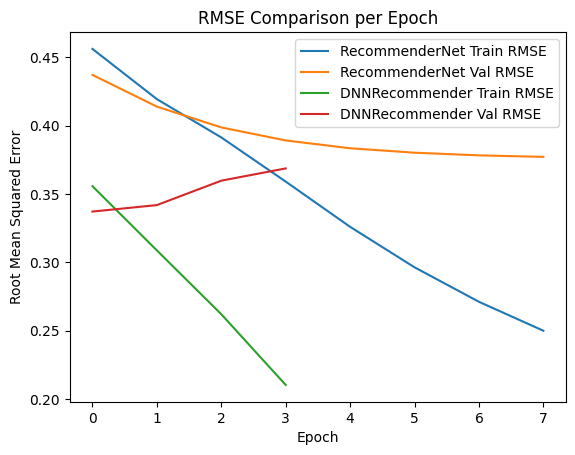

In [45]:
for model_name, history in histories.items():
    plt.plot(history.history['root_mean_squared_error'], label=f'{model_name} Train RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label=f'{model_name} Val RMSE')

plt.title('RMSE Comparison per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

Insight

Berdasarkan hasil training model RecommenderNet dan DNNRecommender, keduanya menunjukkan penurunan nilai loss dan root mean squared error (RMSE) yang signifikan pada epoch-epoch awal. Ini mengindikasikan bahwa model mampu belajar dengan cepat pada tahap awal pelatihan.

Untuk model RecommenderNet, performa terbaik pada data validasi tercapai pada epoch ke-5, dengan val_loss sebesar 0.15574 dan val_RMSE sebesar 0.3835. Setelah epoch ke-5, nilai validation loss mulai meningkat, sementara training loss terus membaik hingga epoch ke-8. Hal ini menunjukkan bahwa model mulai mengalami overfitting, yaitu terlalu menyesuaikan diri terhadap data latih dan kehilangan kemampuan generalisasinya terhadap data baru. Mekanisme EarlyStopping bekerja dengan baik dengan menghentikan pelatihan pada epoch ke-8 dan mengembalikan bobot model ke kondisi terbaik dari epoch ke-5.

Sementara itu, untuk model DNNRecommender, performa terbaik dicapai sangat awal, yaitu pada epoch pertama, dengan val_loss sebesar 0.11364 dan val_RMSE sebesar 0.3371. Setelahnya, validation loss meningkat secara konsisten hingga epoch ke-4, menunjukkan bahwa model mengalami overfitting sangat cepat dan tidak memperoleh manfaat dari pelatihan lebih lama. EarlyStopping menghentikan pelatihan dan mengembalikan bobot model ke kondisi pada epoch pertama.

Secara keseluruhan, kedua model menunjukkan kemampuan belajar yang baik di awal, dan penggunaan pendekatan EarlyStopping terbukti efektif untuk menjaga performa model dengan mencegah overfitting. Namun, DNNRecommender cenderung lebih sensitif terhadap overfitting dan mungkin memerlukan regularisasi tambahan atau penyesuaian arsitektur agar dapat mempertahankan performa pada data validasi.